In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
folder = './dog-breeds'
cat = ['german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler', 'beagle', 'bulldog', 'dalmatian']
img = []
flatten_img = []
targets = []


for i in cat:
    path = os.path.join(folder, i)
    for j in os.listdir(path):
        image_arr = imread(os.path.join(path, j))
        img_resize = resize(image_arr, (255, 255, 3))
        img.append(img_resize)
        img_flatten = img_resize.flatten()
        flatten_img.append(img_flatten)
        targets.append(cat.index(i))

In [4]:
img_arr = np.array(img)
flatten_img_arr = np.array(flatten_img)
targets_arr = np.array(targets)

In [5]:
np.shape(targets_arr)

(541,)

There are 541 images in data dataset.

In [6]:
print(f"number of categories : {np.unique(targets_arr).shape[0]}")

number of categories : 8


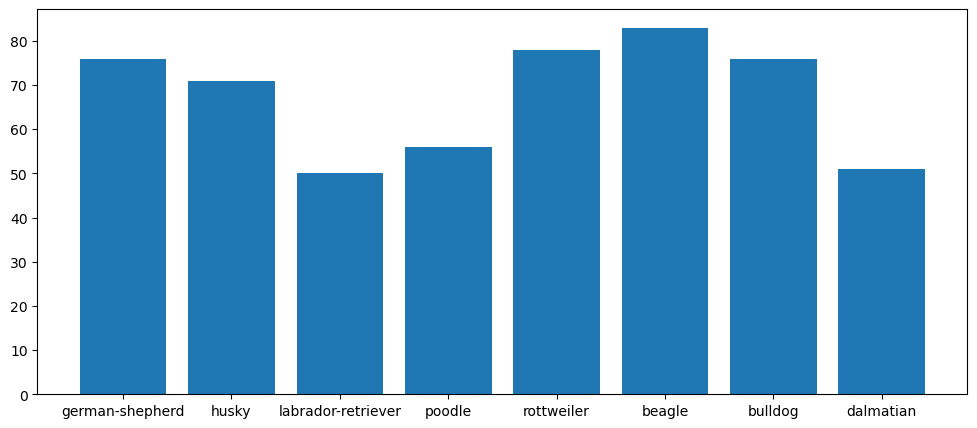

In [7]:
plt.figure(figsize = (12, 5))
plt.bar(cat, Counter(targets_arr).values())
plt.show()

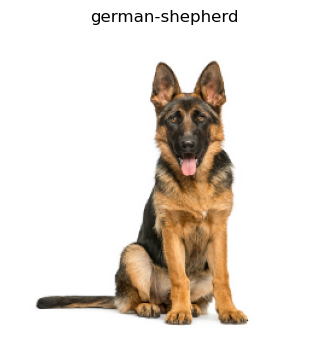

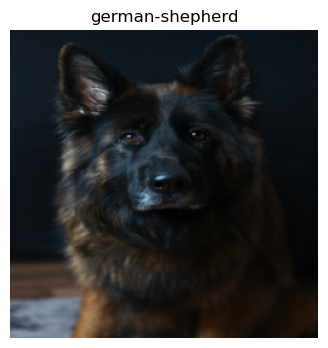

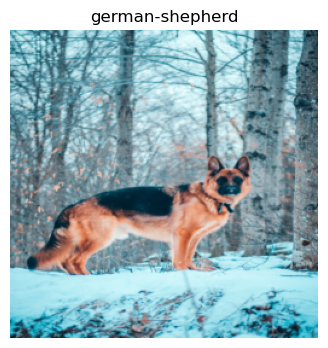

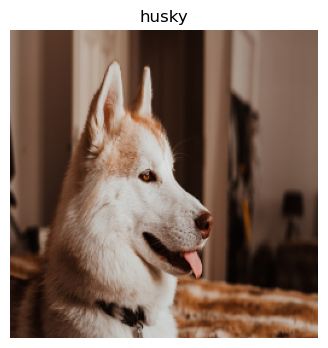

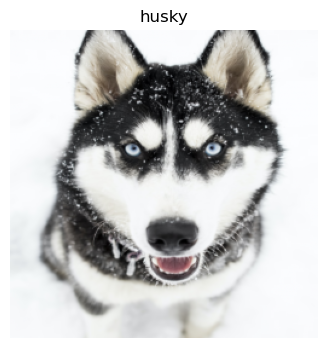

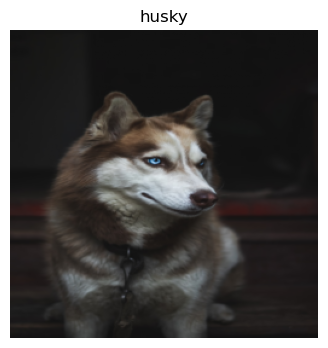

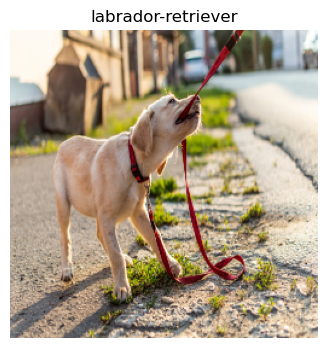

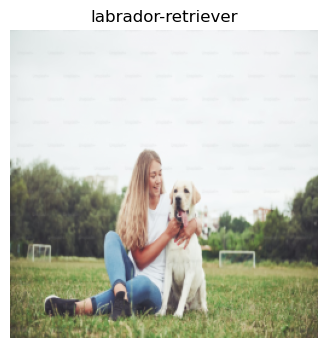

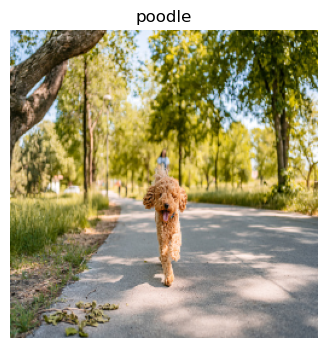

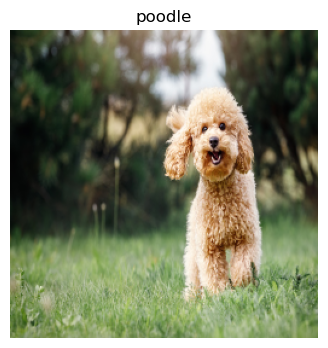

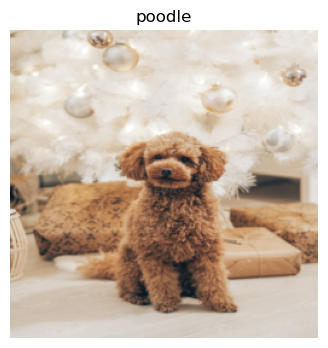

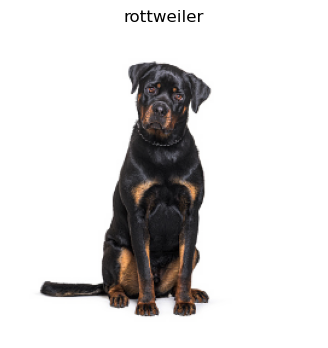

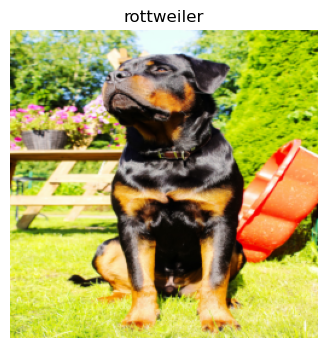

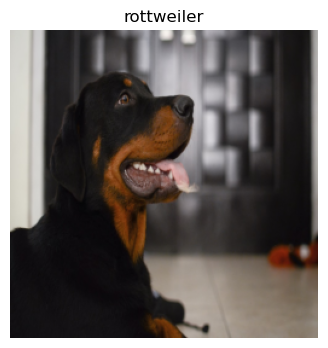

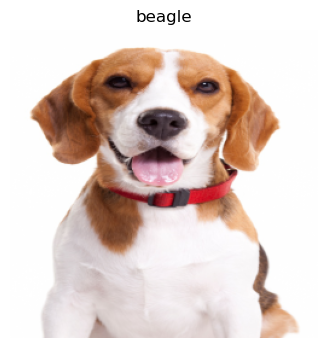

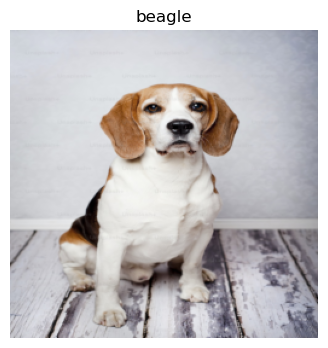

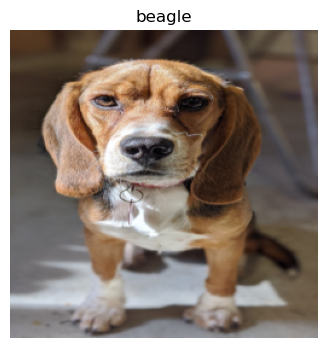

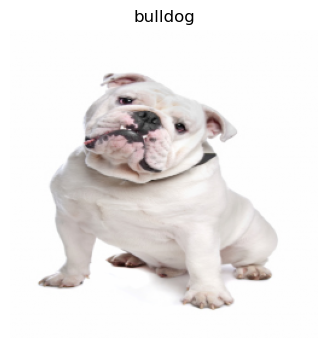

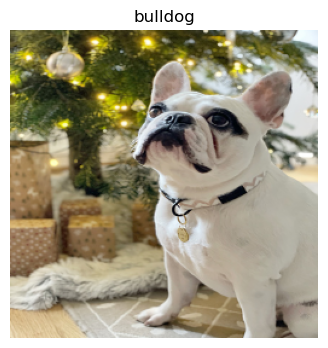

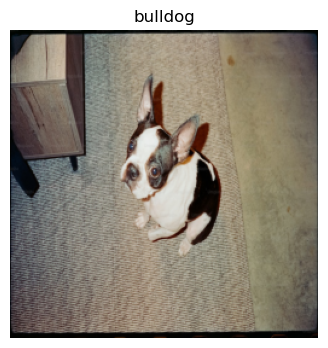

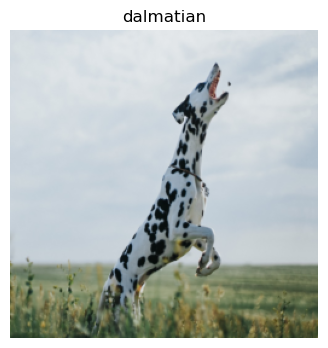

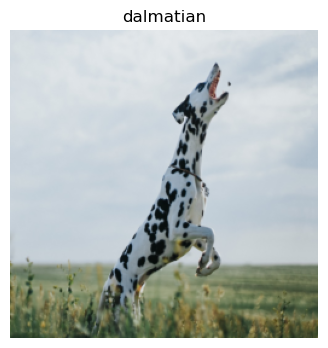

In [8]:
for i in range(1, sum(np.shape(targets_arr)), 25):
    plt.figure(figsize = (4, 4))
    plt.imshow(img_arr[i])
    plt.title(cat[targets_arr[i]])
    plt.axis('off')
    plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(flatten_img_arr, targets_arr, shuffle = True, train_size = 0.8, random_state = 455)

In [10]:
mm = MinMaxScaler()
mm.fit(x_train)

MinMaxScaler()

In [11]:
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

# Model building

In [12]:
models = {
    'Logistics Regression' : LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'SVC' : SVC()
}

In [20]:
def model_building(model, x_train, y_train, x_test, y_test):
    print(model)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print(classification_report(y_test, y_test_pred))
    
    sns.set()
    plt.figure(figsize = (8, 8))
    sns.heatmap(data = confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix')
    plt.show()

LogisticRegression()
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        18
           1       0.67      0.80      0.73        10
           2       0.75      0.90      0.82        10
           3       0.87      0.93      0.90        14
           4       0.60      0.92      0.73        13
           5       0.86      0.67      0.75        18
           6       0.76      0.65      0.70        20
           7       1.00      1.00      1.00         6

    accuracy                           0.78       109
   macro avg       0.80      0.82      0.80       109
weighted avg       0.80      0.78      0.78       109



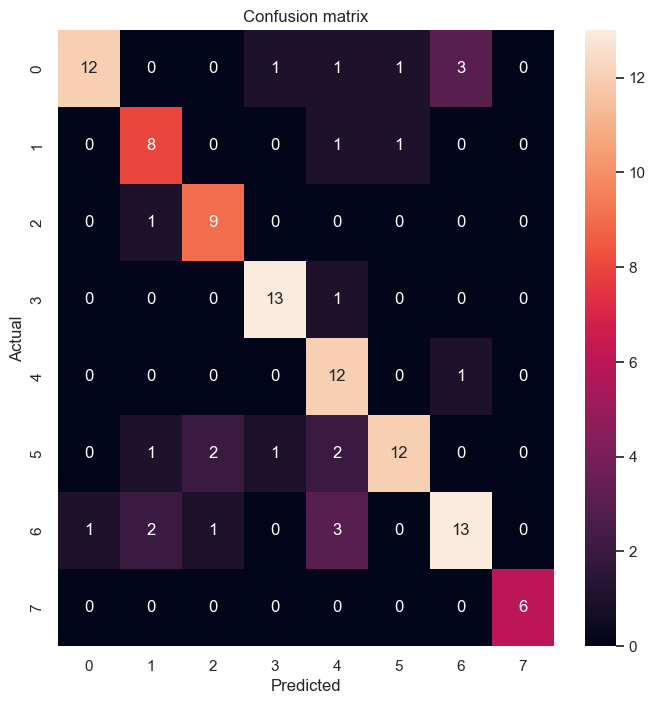

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.35      0.33      0.34        18
           1       0.22      0.40      0.29        10
           2       0.33      0.60      0.43        10
           3       0.12      0.14      0.13        14
           4       0.38      0.38      0.38        13
           5       0.67      0.22      0.33        18
           6       0.43      0.30      0.35        20
           7       0.14      0.17      0.15         6

    accuracy                           0.31       109
   macro avg       0.33      0.32      0.30       109
weighted avg       0.37      0.31      0.31       109



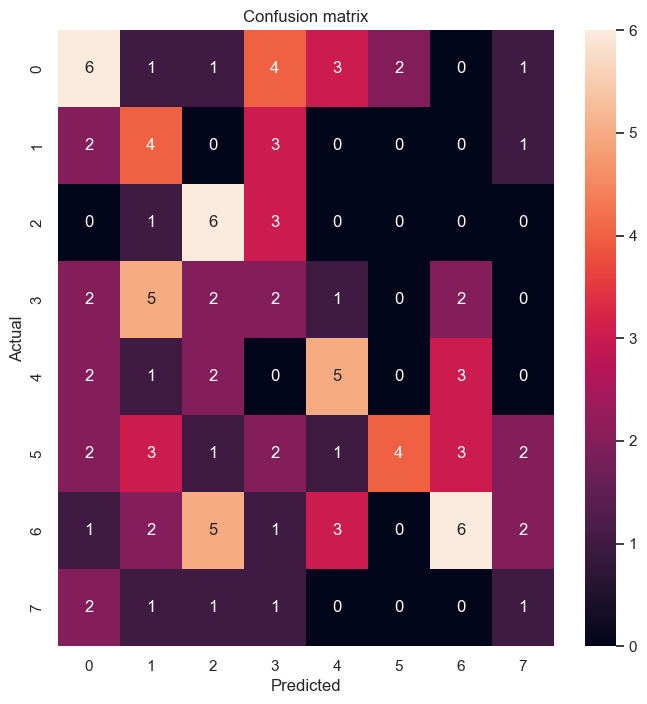

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.82      0.90      0.86        10
           2       0.60      0.90      0.72        10
           3       0.67      0.86      0.75        14
           4       1.00      0.92      0.96        13
           5       0.81      0.72      0.76        18
           6       0.82      0.45      0.58        20
           7       0.75      1.00      0.86         6

    accuracy                           0.74       109
   macro avg       0.76      0.80      0.76       109
weighted avg       0.76      0.74      0.74       109



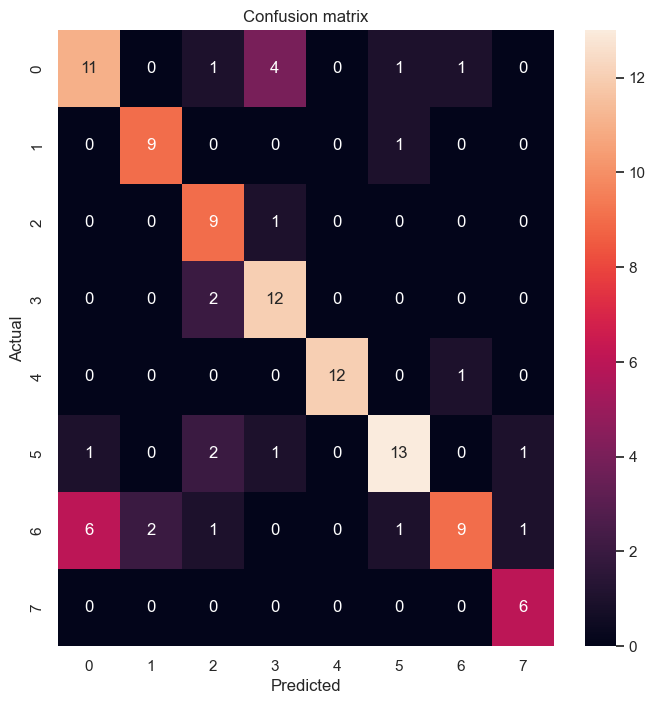

SVC()
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.47      0.80      0.59        10
           2       0.60      0.60      0.60        10
           3       0.83      0.71      0.77        14
           4       0.91      0.77      0.83        13
           5       0.71      0.67      0.69        18
           6       0.71      0.60      0.65        20
           7       1.00      1.00      1.00         6

    accuracy                           0.72       109
   macro avg       0.75      0.74      0.74       109
weighted avg       0.74      0.72      0.72       109



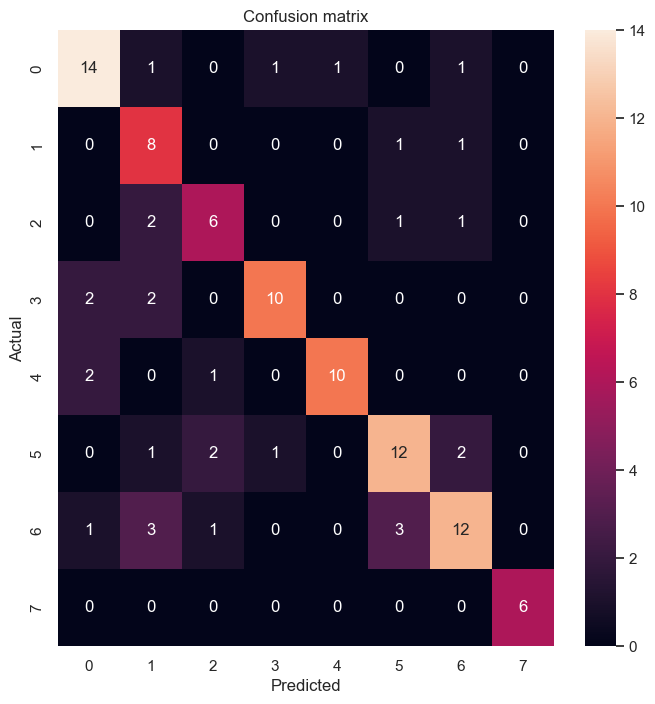

In [21]:
for i in models.values():
    model_building(i, x_train, y_train, x_test, y_test)